In [27]:
n_dat = 900

Loaded model from disk
-------------------------------------------------------------------
Hay un total de 900 láminas de cartón.
Se estima que hay 462 láminas del tipo A y 438 láminas del tipo B.
-------------------------------------------------------------------

-------------------------------------------------------------------
Se tuvo un total de 848 aciertos y 52 no aciertos.
La eficacia de la red neuronal para los datos TEST es de 94.22%
-------------------------------------------------------------------


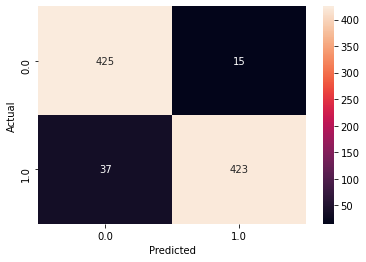

In [28]:
import pandas as pd
import numpy as np
from keras import models
from keras import layers
from keras.utils import to_categorical

cardboard_f = pd.read_excel("cardboard.xlsx", header=None)
cardboard_f = cardboard_f.to_numpy()

np.random.shuffle(cardboard_f)

n_real=1800-n_dat
cardboard_f_test = cardboard_f[n_real:,:10]
test_labels = cardboard_f[n_real:,10]

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = models.model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

loaded_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

prediction_vector = loaded_model.predict(cardboard_f_test)


type_zero_count = 0
type_one_count = 0

guesses = np.ones(len(prediction_vector))

for j in range (len(prediction_vector)):
    if prediction_vector[j,0] > prediction_vector[j,1]:
        type_zero_count += 1
        guesses[j] = 0
    else:
        type_one_count += 1
        guesses[j] = 1
        
print("-------------------------------------------------------------------")
print("Hay un total de {} láminas de cartón.".format(len(prediction_vector)))
print("Se estima que hay {} láminas del tipo A y {} láminas del tipo B.".format(type_zero_count,type_one_count))
print("-------------------------------------------------------------------")

hits = 0
for j in range (len(guesses)):    
    if guesses[j] == test_labels[j]:
        hits += 1
        
efficiency = round(hits/len(guesses)*100,2)
non_hits = len(guesses) - hits

print("\n-------------------------------------------------------------------")
print("Se tuvo un total de {} aciertos y {} no aciertos.".format(hits,non_hits))
print("La eficacia de la red neuronal para los datos TEST es de {}%".format(efficiency))
print("-------------------------------------------------------------------")

import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    test_labels,
        'y_Predicted': guesses
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()